| Step                                                                 | Name  |
|----------------------------------------------------------------------|-------|
| Calculate basic statistics                                           |  TUDI     |
| Number of samples and number of samples per class: is your dataset balanced? |  TUDI     |
| Min / avg / max length of text                                       | TUDI      |
| Determining the national language(s) used                            |  TUDI     |
| Reading through 100+ samples: noteworthy style, vocabulary, spelling |       |
| Establish a structured and flexible processing pipeline              |       |
| - Reading the dataset                                                |       |
| - Tokenizing                                                        |       |
| - Normalizing (lowercasing, lemmatizing/stemming, …)               |       |
| - Token filtering (stop words, …)                                    |       |
| Calculate TFDs for different variants of your processing pipeline    |       |
| Are there differences per class?                                     |       |
| Submit your Jupyter notebook with code and findings via Moodle      |    X   |


In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import matplotlib.pyplot as plt 
import pandas as pd 
import spacy 

pd.set_option('display.max_colwidth', None) 

# 1. Data Acquistion 

https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus

The Mental Health Corpus is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not. The corpus can be used for a variety of purposes, such as sentiment analysis, toxic language detection, and mental health language analysis. The data in the corpus may be useful for researchers, mental health professionals, and others interested in understanding the language and sentiment surrounding mental health issues.

In [24]:
corpus = pd.read_csv('resources\mental_health.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\tudor\AppData\Local\Temp\ipykernel_18940\2551837794.py:1: SyntaxWarning: invalid escape sequence '\m'
  corpus = pd.read_csv('resources\mental_health.csv')


In [25]:
corpus.head()

,text,label
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,0
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself,1
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs,0
3,im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy brain feels like constantly like static tv wont shut overthinking do think im running options dont see living past got accepted health science degree dont even know wanna try know im smart mental illness holds back think cant anything im good enough need fucking help dont know anymore ive run options,1
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electronic means first girl schizophrenic host illnesses too dad severe anger issues abuses physically mentally makes serve food wash dishes clean house shouts beats petty things like spilling water picking toys floor threatened knife beats plates glasses punches head last time got beat around month ago one siblings gets beat up tried tell mother beating showed bruises too mother refuses believe even laughed off probably fear confronting him husband yells wife too family treat well either sister mean tell father put trouble family tends isolate her even remember birthday all family cold her often tend alienate since act normal girl often feels suicidal due this inflicted selfharm cut wrist starves believes way family accept her make worse two incidents life must tell about raped walking back home night initially tell parents sometime later police reports filed rape suffered false pregnancy girl symptoms disorder like lactating breasts happened early depressed incident summer approximately family sent couple family friends wellknown treatments advertised herbal therapy accupuncture etc however happened next terrible left alone husband wife went somewhere else guy tortured her instance made sit container filled water upto neck closed lid imagine kind stress panic would cause schizophrenic patient miscellaneous details gt gets visit psychiatrist school able hide problems psychiatrist noted girl able put front really well gt five psychiatrists past gt enjoys drawingpainting learning new languages writing poems gt depressed tends victimized mentality blames problems want report abuse due trouble family face tells stopped cutting lately problem refuses tell anyone abuse even tries defend father saying fault help her although seem extremely suicidal concern physically mental abuse girl subject everyday healthy environment anyone grow in really wish rescued clutches belligerent controlling father dysfunctional family,1


<h3> 1.1 Basic Statistics

In [26]:
corpus.describe()

,label
count,27977.000000
mean,0.494621
std,0.499980
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**REMARK**: We have 28_000 comments, where 49% are labelled as toxic comments.   
$\textit{The dataset is balanced between toxic and non-toxic comments.}$


<h3> 1.2 Number of Samples per Class 

In [27]:
counts = corpus['label'].value_counts()
counts

label
0    14139
1    13838
Name: count, dtype: int64

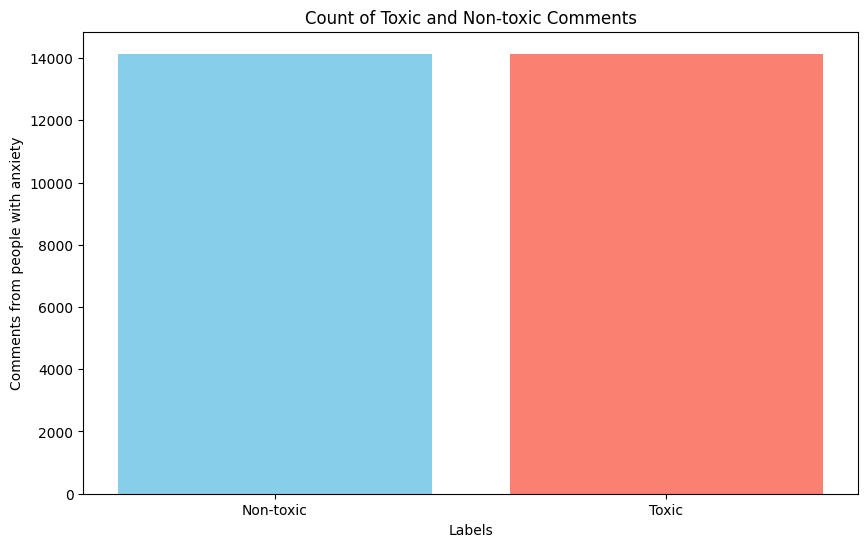

In [30]:
plt.figure(figsize=(10,6))

plt.bar(['Non-toxic','Toxic'],[counts.get(0,0), counts.get(0,1)],color=['skyblue','salmon'])
plt.title('Count of Toxic and Non-toxic Comments')
plt.xlabel('Labels')
plt.ylabel('Comments from people with anxiety')

plt.show()

<h3> 1.3 Determine National Language

In [39]:
from utils.acquisition import Language_Detector
from sklearn.pipeline import Pipeline

In [40]:
acquisition_pipeline = Pipeline(steps=[
    ('language detector', Language_Detector())
])

acquisition_pipeline.fit_transform(corpus)

,text,label,language,detected_language
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,0,None,en
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself,1,None,en
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs,0,None,en
3,im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy brain feels like constantly like static tv wont shut overthinking do think im running options dont see living past got accepted health science degree dont even know wanna try know im smart mental illness holds back think cant anything im good enough need fucking help dont know anymore ive run options,1,None,en
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electronic means first girl schizophrenic host illnesses too dad severe anger issues abuses physically mentally makes serve food wash dishes clean house shouts beats petty things like spilling water picking toys floor threatened knife beats plates glasses punches head last time got beat around month ago one siblings gets beat up tried tell mother beating showed bruises too mother refuses believe even laughed off probably fear confronting him husband yells wife too family treat well either sister mean tell father put trouble family tends isolate her even remember birthday all family cold her often tend alienate since act normal girl often feels suicidal due this inflicted selfharm cut wrist starves believes way family accept her make worse two incidents life must tell about raped walking back home night initially tell parents sometime later police reports filed rape suffered false pregnancy girl symptoms disorder like lactating breasts happened early depressed incident summer approximately family sent couple family friends wellknown treatments advertised herbal therapy accupuncture etc however happened next terrible left alone husband wife went somewhere else guy tortured her instance made sit container filled water upto neck closed lid imagine kind stress panic would cause schizophrenic patient miscellaneous details gt gets visit psychiatrist school able hide problems psychiatrist noted girl able put front really well gt five psychiatrists past gt enjoys drawingpainting learning new languages writing poems gt depressed tends victimized mentality blames problems want report abuse due trouble family face tells stopped cutting lately problem refuses tell anyone abuse even tries defend father saying fault help her although seem extremely suicidal concern physically mental abuse girl subject everyday healthy environment anyone grow in really wish rescued clutches belligerent controlling father dysfunctional family,1,None,en
...,...,...,...,...
27972,posting everyday people stop caring religion matter private thing allowed share it force others also people treated diferently religions belief pearson stopped seeks harm humans care others religions,0,None,en
27973,okay definetly need hear guys opinion ive pretty much love one best friends now im m shes f met lot summer pretty much always asked wanted meet always wanted never asked me also slow responds messages shes slow reply others too know

In [42]:
corpus['detected_language'].value_counts()

detected_language
en         26581
da           282
af           260
nl           112
no           112
fr            81
so            75
et            68
sv            56
cy            52
it            52
tl            42
ca            26
es            24
id            20
sl            17
hr            14
ro            14
pt            13
pl            13
de            11
fi            10
sq             8
tr             7
hu             6
sw             5
cs             5
sk             4
vi             3
UNKNOWN        2
lt             1
lv             1
Name: count, dtype: int64